## Class Exercise 1 ##

Please complete your code in the template below. 

You shall write your code in the cells between the markings <b><u>#TO DO</u></b> and <b><u>#END TO DO</u></b> and follow the instructions in each cell.

### <u>The concepts of Vectorization, estimation of J and Gradient Descent</u> ###
Please read these so you get some hints and ideas for the implementation

### Vectorization of a complete dataset ###

With the construct that we created above for a single data point, we can now extend the argument to the whole dataset with m data points in the following way:<br><br>
We can either have every data point in a row (the usual way in which we get the datasets) or in columns. Both ways work as long as we do our Matrix operations correctly, keeping in mind the dimensions of the matrix. This is a univariate dataset with varaible $x_1$. <br>$x_0$ is the dummy variable that has been inserted and = 1 and there are m data points in this dataset.<br><br>
$X = \begin{bmatrix} x_{10}&x_{11}\\x_{20}&x_{21}\\\dots\\x_{i0}&x_{i1}\\\vdots\\x_{m0}&x_{m1}\end{bmatrix}$ and $y = \begin{bmatrix} y_1\\y_2\\\dots\\y_i\\\vdots\\y_m\end{bmatrix}$<br><br>
and initialize $\Theta = \begin{bmatrix} \theta_0\\\theta_1\\\end{bmatrix}$<br><br>
So X = m x 2 matrix and $\Theta$ = 2 x 1 matrix, and therefore the vectorized form in this case will again be the dot product:<br><br>
$\pmb{h_\theta(x) = X\Theta}$ which will give us a m x 1 matrix as a result.<br><br>
This is dimensionally correct as y is also a m x 1 matrix and now we can perform the $h_\theta(x) - y$ operation, which with matrix operation is nothing but:<br><br>
prediction error = $X\Theta - y$<br><br>
And finally, if you sum this up, $\Sigma_m(X\Theta - y)$, you will get the value of J.<br><br>
The final value of J = $\pmb{\frac{1}{2m}\Sigma_m(X\Theta - y)^2}$<br>
and this will be the only line you will code to do a single shot estimation of J (without any "for loops", etc) in 1 iteration. The only for loop will be for the "n iterations" of gradient descent to minimize the J value.

### The next step would be to calculate the first step of Gradient Descent and update the $\theta$ values. ###
We have our initialized $\Theta$ column vector or matrix and the gradient descent step in each iteration should update these values. Mathematically that looks as follows:<br><br>
$\begin{bmatrix} \theta_0\\\theta_1\\\end{bmatrix}=\begin{bmatrix} \theta_0\\\theta_1\\\end{bmatrix}-\alpha\begin{bmatrix}\frac{\partial J}{\partial \theta_0}\\\frac{\partial J}{\partial \theta_1}\\\end{bmatrix}$<br><br>
Where $\alpha$ is the learning rate. The value of alpha should not be too large (causes oscilattion and never finds the lowest point) OR too small (gradient descent can take too many iterations to converge). A good starting value could be 0.01 or 0.001 and then one can tune it. <br><br> As one can see, again the update step is a single operation and all values of $\Theta$ get updated simultaneously in each iteration.<br><br>
In the algorithm shown on the slides, we already have the results sfor $\frac{\partial J}{\partial \theta_0},\frac{\partial J}{\partial \theta_1}$ and only have to implement in code using matrix operations. The results of differentiation are shown here again:<br><br>
$\frac{\partial J}{\partial \theta_0} = \frac{1}{m}\Sigma(h_\theta(x) - y)*x_0$ and<br><br>
$\frac{\partial J}{\partial \theta_1} = \frac{1}{m}\Sigma(h_\theta(x) - y)*x_1$ and<br><br>


In [2]:
# Import the required libraries

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt  

### Develop the Gradient Descent Algorithm ###

In [3]:
#TO DO


# Read in the dataset using pandas
# Use the variable called "data" as your dataframe

data = pd.read_csv('regression.csv') # Read the data

#END TODO

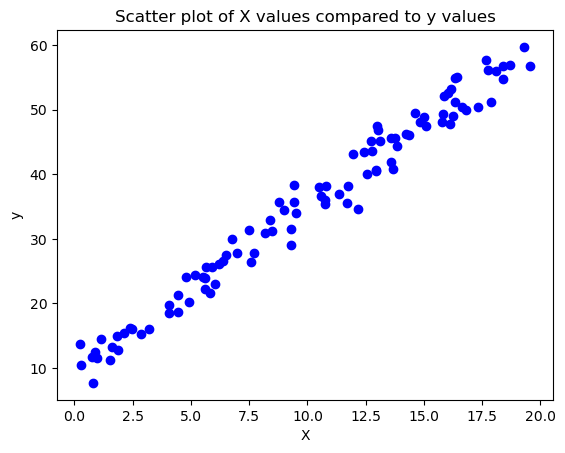

In [4]:
#TO DO

# Plot a scatter plot and visualize the data
plt.scatter(data['X'], data['y'], color='blue', marker='o') # Scatter plot of the data
plt.xlabel('X') # Label for x-axis
plt.ylabel('y') # Label for y-axis
plt.title('Scatter plot of X values compared to y values') # Title of the plot
plt.show() # Display the plot

#END TO DO

In [5]:
#TO DO

# Separate the variable data into corresponding X and y values.
# Make sure they have the shape: (m,1)

X = data['X'].values.reshape(-1,1) # Reshape the X values into a 2D array with 1 column
y = data['y'].values.reshape(-1,1) # Reshape the y values into a 2D array with 1 column


# Insert a column of 1's the first column of X - check out np.insert(...) command
X = np.insert(X, 0, 1, axis=1) # Insert a column of 1's into X array at index 0


#END TO DO

# Print shapes of X and y
print(f"Shape of X:{X.shape} and y {y.shape}\n")
print(f"X:\n{X[:10]}\n\ny\n{y[:10]}")

Shape of X:(100, 2) and y (100, 1)

X:
[[ 1.          6.97534396]
 [ 1.          0.95290665]
 [ 1.          4.43535907]
 [ 1.         13.57629993]
 [ 1.          1.8185914 ]
 [ 1.         14.84471166]
 [ 1.         12.9515742 ]
 [ 1.         18.10397628]
 [ 1.         16.22642935]
 [ 1.         13.0115794 ]]

y
[[27.80471499]
 [11.54318271]
 [18.65369591]
 [45.59911516]
 [14.90142601]
 [48.04421269]
 [40.61356841]
 [55.93457725]
 [49.08992666]
 [46.92535652]]


In [14]:
#TO DO

# Initialized the empty list 'J_hist' to append the values of J in ever iteration
J_hist = [] # will store the cost values for each iteration

# Initialized the empty list called 'iterations' to append the values of each iteration i.
iterations = [] # will store the iteration values

# Initialized the value of the learning rate as "alpha".
alpha = 0.001 # Given lerning rate from professor Rao's slides

# Initialize the values of theta0 and theta1 as a 2x1 numpy array
theta = np.zeros((2,1)) # Initialized theta0 and theta1 as a 2x1 numpy array on zeroes

print(f"Intiial Theta values:\n{theta}")

# Code for the actual algorithm here for 1000 iterations.
# Compute J in each iteration, do the gradient descent step after that 
# and then append values of J and i to J-hist and iterations.
# Try different iteration values and see how low an error you can get with the algorithm still converging

for i in range(1000):
    h_theta = np.dot(X, theta) # Compute the hypothesis ((theta_0)(x_0) - (theta_1)(x_1))
    pred_error = h_theta - y # Compute the prediction error (h_theta(x_i) - y_i)
    m = len(y) # Number of training examples

    J = (1 / (2 * m)) * np.sum((pred_error) ** 2) # Minimize the cost function J(theta)
    theta = theta - (alpha / m) * np.dot(X.T, pred_error)  # Gradient descent step

    J_hist.append(J) # Record the cost by appending the value of J to J_hist
    iterations.append(i) # Append the value of i to iterations


#END TO DO

# Print max and min value of J and final values of theta
print(f"Final value of Theta:\n{theta}\n\nMax J:{max(J_hist)}\n\nMin J:{min(J_hist)}")

Intiial Theta values:
[[0.]
 [0.]]
Final value of Theta:
[[2.17450322]
 [3.12192004]]

Max J:721.4951561023522

Min J:8.778441631074834


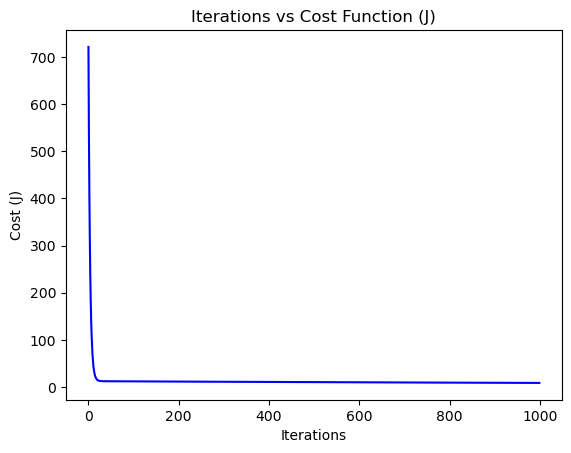

In [15]:
#TO DO

# Plotting iterations vs J with proper title and axis labels
plt.plot(iterations, J_hist, color='blue') # Plot the iterations vs J
plt.xlabel('Iterations') # Label for x-axis
plt.ylabel('Cost (J)') # Label for y-axis
plt.title('Iterations vs Cost Function (J)') # Title of the plot
plt.show() # Display the plot (error drops as iterations increase)

#END TO DO

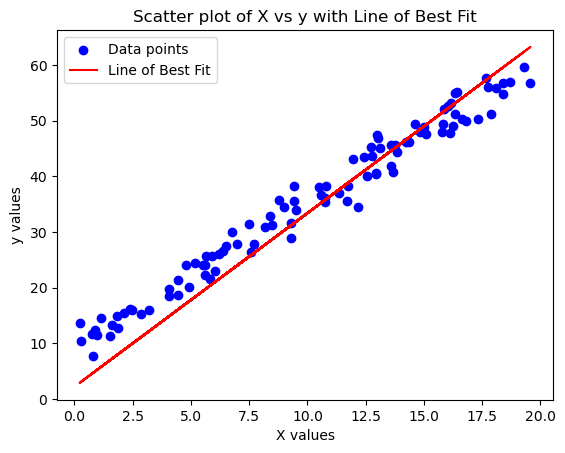

In [18]:
#TO DO

# Plot the line of best fit - remember you have just computed the optimal coefficients of slope and intercept
plt.scatter(data['X'], data['y'], color='blue', marker='o', label='Data points') # Scatter plot
plt.plot(data['X'], X.dot(theta), color='red', label='Line of Best Fit') # Line of best fit
plt.ylabel('y values') # Label for y-axis
plt.xlabel('X values') # Label for y-axis
plt.title('Scatter plot of X vs y with Line of Best Fit') # Title of the plot
plt.legend() # Display the legend
plt.show() # Display the plot

#END TO DO